# Students' Performance In Exams-EDA 

### Questions I had when I first took a look at the data:
* Did female students score more than male students?
* Does the parental level of education affect the students' scores?
* Is Lunch free or reduced for people who scored higher in the subjects?
* Does the student's ethnicity affect his grades?
* Did female students complete the test preparation course in a higher proportion than male students?
* Which ethnicity of students were scoring the most?
* Were children of parent's having a high school degree able to score well?
* Is there a connection between race and parental level of education?
* Has lunch been reduced or made free for  people whose parents just passed high school?
And many more.

I have tried to illustrate the comparisons through graphs and made observations accordingly.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
st= pd.read_csv('StudentsPerformance.csv',sep=',')
st.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
st.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


**Numerical variable:** Math Score, Reading Score, Writing Score

**Catagorical Variable:** Gender, Race/Ethnicity, Parental Level Of Eductaion, Test Preparation Course, Lunch

In [4]:
st.shape

(1000, 8)

In [5]:
st.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [6]:
st.columns.unique()

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [7]:
st.isnull()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False


In [8]:
st.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

There are no missing values present in the data

In [9]:
st.rename(columns={"parental level of education":"parental_level_of_education","test preparation course":"test_preparation_course","math score":"math_score","reading score":"reading_score","writing score":"writing_score","race/ethnicity":"race_ethnicity"},inplace=True)

In [10]:
st.math_score.nunique()

81

In [11]:
st.math_score.unique()

array([ 72,  69,  90,  47,  76,  71,  88,  40,  64,  38,  58,  65,  78,
        50,  18,  46,  54,  66,  44,  74,  73,  67,  70,  62,  63,  56,
        97,  81,  75,  57,  55,  53,  59,  82,  77,  33,  52,   0,  79,
        39,  45,  60,  61,  41,  49,  30,  80,  42,  27,  43,  68,  85,
        98,  87,  51,  99,  84,  91,  83,  89,  22, 100,  96,  94,  48,
        35,  34,  86,  92,  37,  28,  24,  26,  95,  36,  29,  32,  93,
        19,  23,   8])

Q1 Value: 57.0
Median Value: 66.0
Q3 Value: 77.0
Upper whisker limit: 107.0
Lowerr whisker limit: 27.0


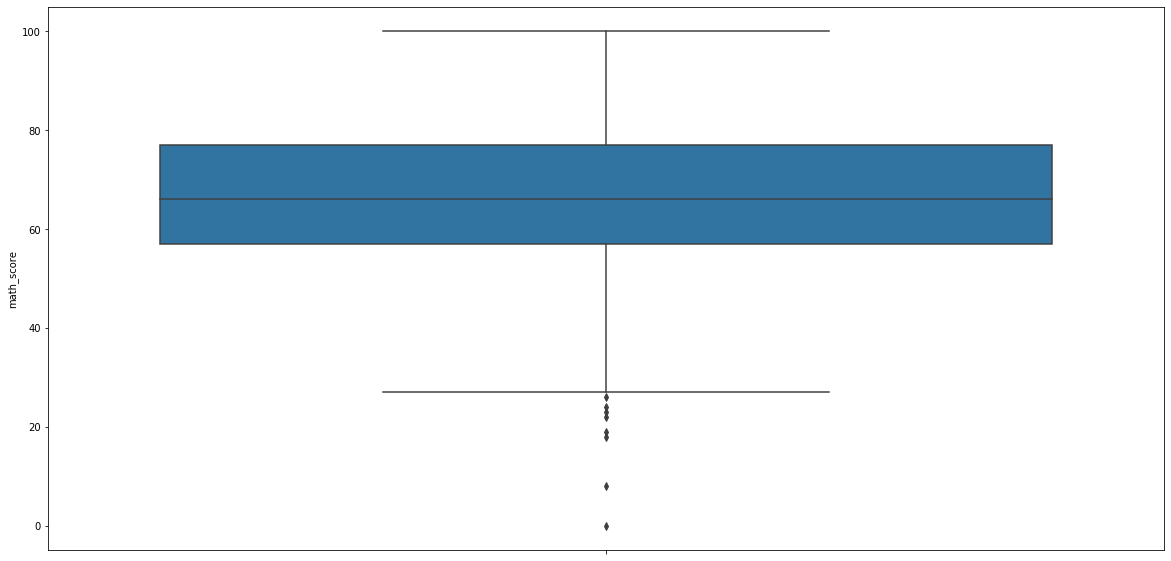

In [12]:
plt.figure(figsize=(20,10))
sns.boxplot(y='math_score',data=st)
Q3 = st.math_score.quantile(.75)
Q1 = st.math_score.quantile(.25)
IQR = Q3 - Q1
Median = st.math_score.median()
print("Q1 Value:",Q1)
print("Median Value:",st.math_score.median())
print("Q3 Value:",Q3)
print("Upper whisker limit:",(Q3 + 1.5*IQR))
print("Lowerr whisker limit:",(Q1 - 1.5*IQR))

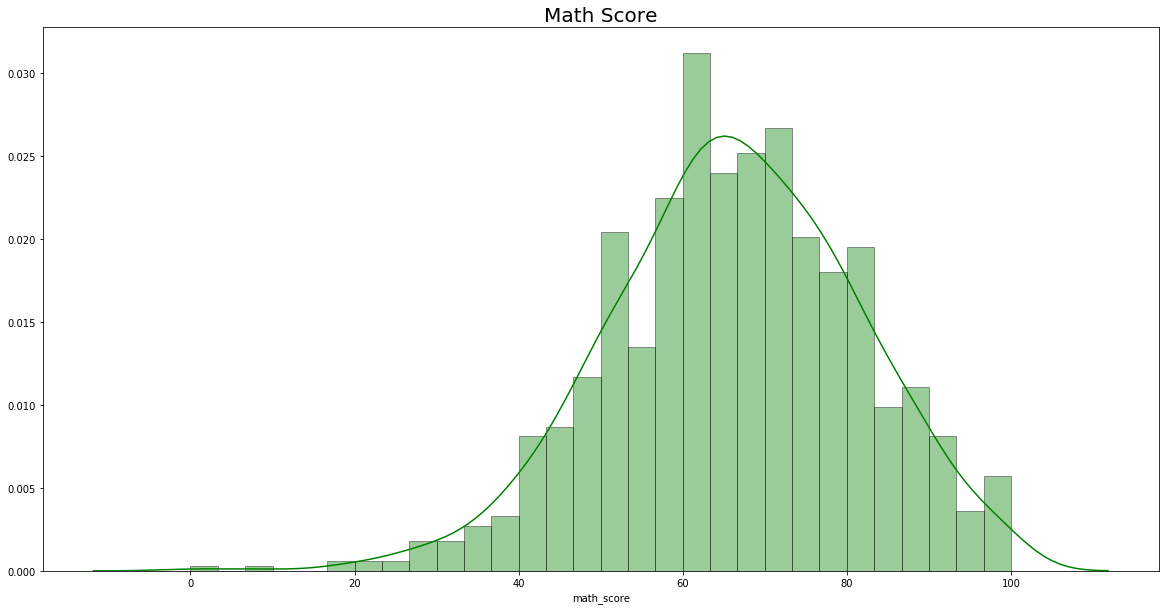

In [47]:
plt.figure(figsize=(20,10))
plt.title('Math Score',fontsize = 20)
sns.distplot(st['math_score'],kde=True,hist=True,bins=30,hist_kws=dict(edgecolor="k", linewidth=1),color="g")

In [14]:
st.reading_score.nunique()

72

In [15]:
st.reading_score.unique()

array([ 72,  90,  95,  57,  78,  83,  43,  64,  60,  54,  52,  81,  53,
        75,  89,  32,  42,  58,  69,  73,  71,  74,  70,  65,  87,  56,
        61,  84,  55,  44,  41,  85,  59,  17,  39,  80,  37,  63,  51,
        49,  26,  68,  45,  47,  86,  34,  79,  66,  67,  91, 100,  76,
        77,  82,  92,  93,  62,  88,  50,  28,  48,  46,  23,  38,  94,
        97,  99,  31,  96,  24,  29,  40])

Text(0.5, 1.0, 'Reading Score')

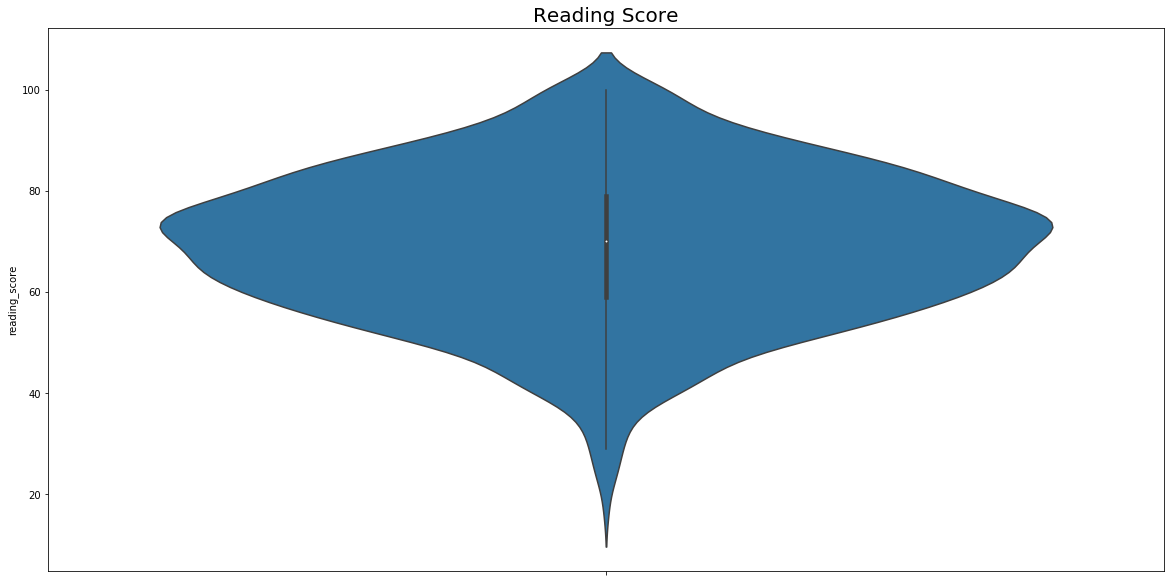

In [16]:
plt.figure(figsize=(20,10))
sns.violinplot(y='reading_score',data=st)
plt.title('Reading Score',fontsize = 20)

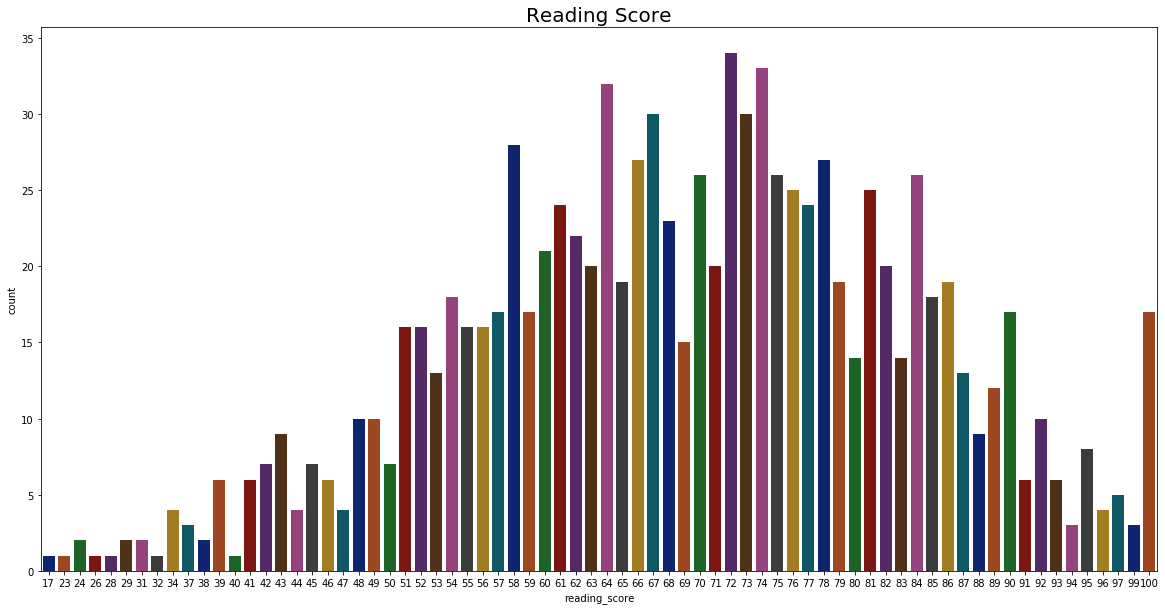

In [17]:
plt.figure(figsize=(20,10))
sns.countplot(st['reading_score'], palette = 'dark')
plt.title('Reading Score',fontsize = 20)
plt.show()

In [18]:
st.writing_score.nunique()

77

In [19]:
st.writing_score.unique()

array([ 74,  88,  93,  44,  75,  78,  92,  39,  67,  50,  52,  43,  73,
        70,  58,  86,  28,  46,  61,  63,  53,  80,  72,  55,  65,  38,
        82,  79,  83,  59,  57,  54,  68,  66,  62,  76,  48,  42,  87,
        49,  10,  34,  71,  37,  56,  41,  22,  81,  45,  36,  89,  47,
        90, 100,  64,  98,  51,  40,  84,  69,  33,  60,  85,  91,  77,
        27,  94,  95,  19,  35,  32,  96,  97,  99,  15,  30,  23])

Q1 Value: 57.75
Median Value: 69.0
Q3 Value: 79.0
Upper whisker limit: 110.875
Lowerr whisker limit: 25.875


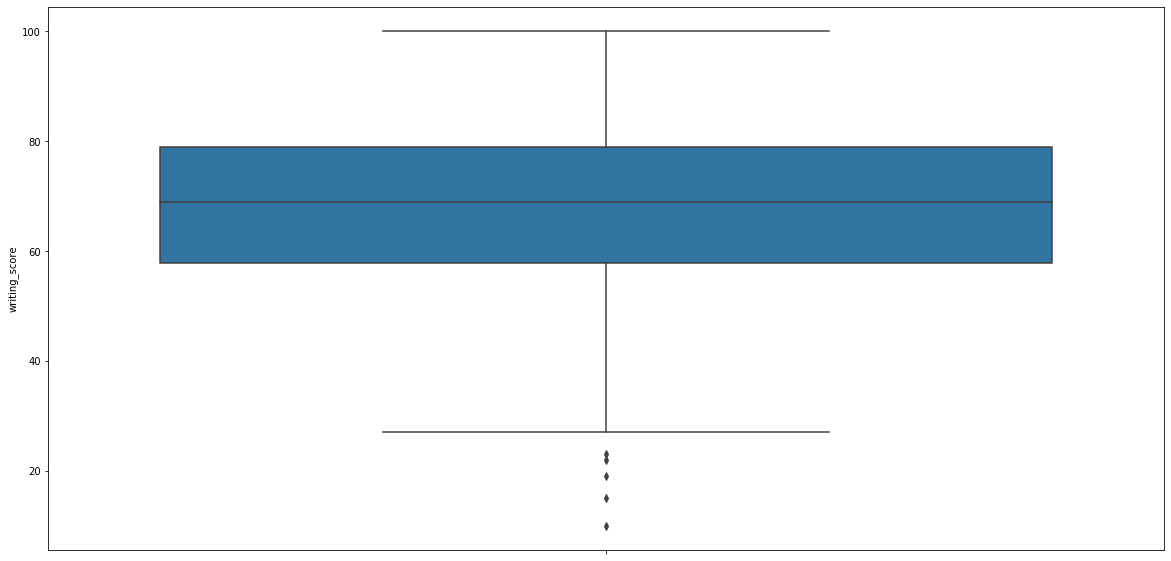

In [20]:
plt.figure(figsize=(20,10))
sns.boxplot(y='writing_score',data=st)
Q3 = st.writing_score.quantile(.75)
Q1 = st.writing_score.quantile(.25)
IQR = Q3 - Q1
Median = st.writing_score.median()
print("Q1 Value:",Q1)
print("Median Value:",st.writing_score.median())
print("Q3 Value:",Q3)
print("Upper whisker limit:",(Q3 + 1.5*IQR))
print("Lowerr whisker limit:",(Q1 - 1.5*IQR))

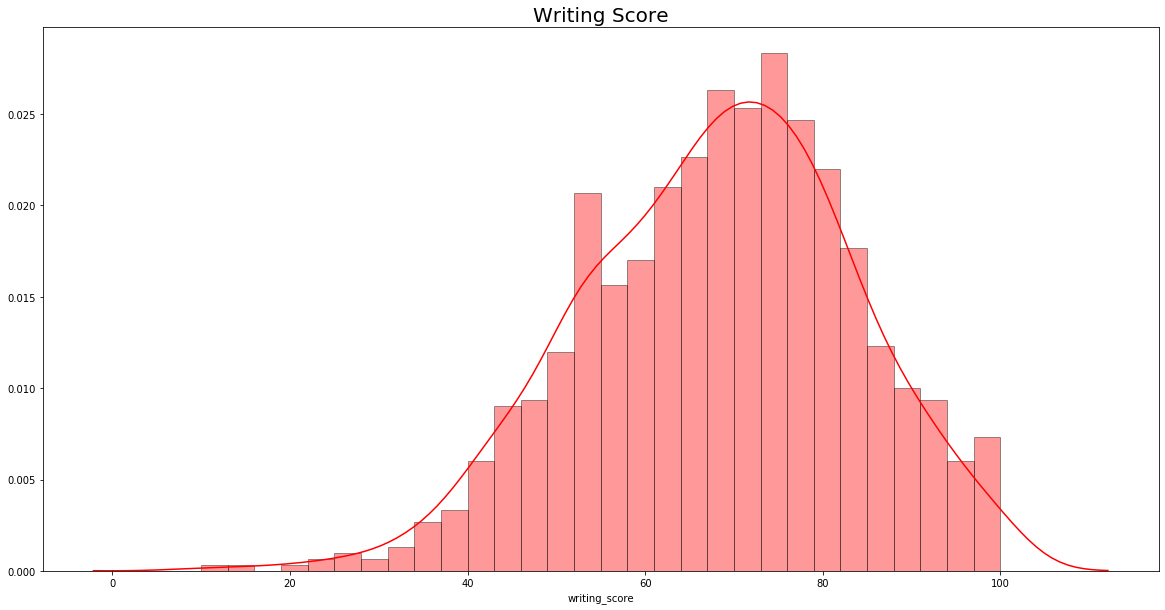

In [46]:
plt.figure(figsize=(20,10))
plt.title('Writing Score',fontsize = 20)
sns.distplot(st['writing_score'],kde=True,hist=True,bins=30,hist_kws=dict(edgecolor="k", linewidth=1),color="r")

# Observations:

* A high proportion of students scored between 60 to 80 marks in all the tests(Reading, Writing and Math)

Now that we have compared the tests with the number of students, we move on to compare the other catagorical variables with the number of students.


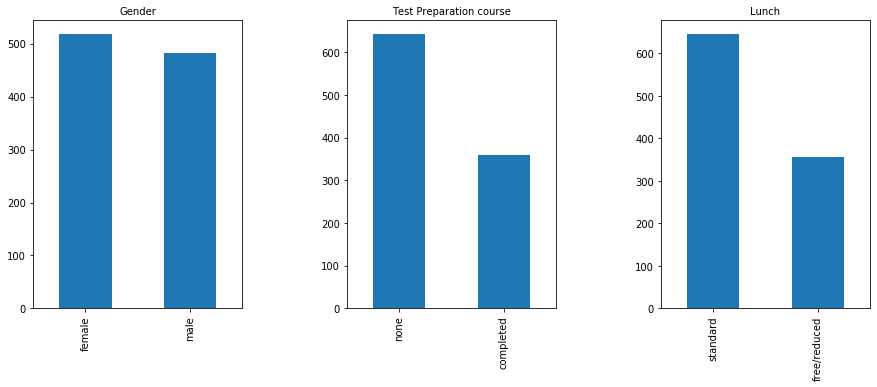

In [22]:
plt.figure(figsize=(15,5))
plt.subplots_adjust(left=0.125,bottom=0.1,right=0.9,top=0.9,wspace=0.5,hspace=0.2)

plt.subplot(131)
plt.title("Gender",fontsize=10)
st.gender.value_counts().plot(kind='bar')

plt.subplot(132)
plt.title("Test Preparation course",fontsize=10)
st.test_preparation_course.value_counts().plot(kind='bar')

plt.subplot(133)
plt.title("Lunch",fontsize=10)
st.lunch.value_counts().plot(kind='bar')

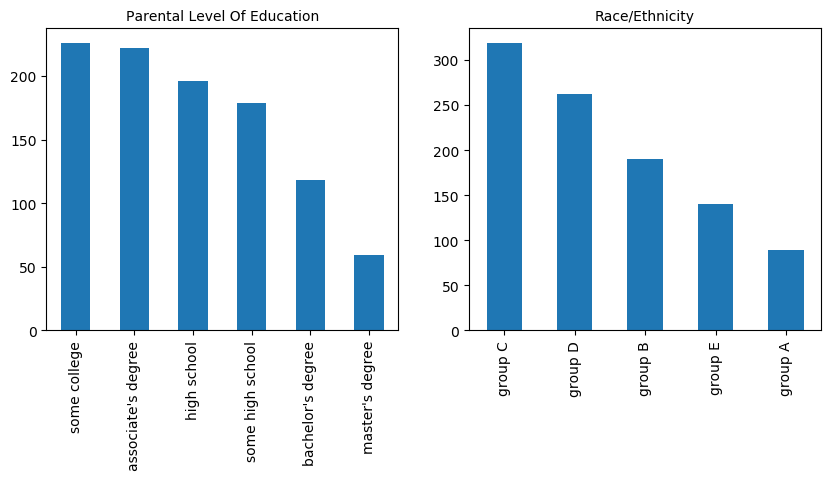

In [23]:
plt.figure(figsize=(10,4), dpi=100) 
plt.subplot(1,2,1)
plt.title("Parental Level Of Education",fontsize=10)
st.parental_level_of_education.value_counts().plot(kind='bar')

plt.subplot(1,2,2)
plt.title("Race/Ethnicity",fontsize=10)
st.race_ethnicity.value_counts().plot(kind='bar')

# Observations:

* There are more females than males in the class.
* Most people did not complete the test preparation course.
* A high proportion of students have Standard Lunch.
* Most parents of students have gone to Some College, have an Associate's degree or have gone to high school.
* There are more students from group C ethnicity in the class followed by group D.

We now take combinations of Numerical variables and Categorical variables and observe how they affect the scores of students in the tests.


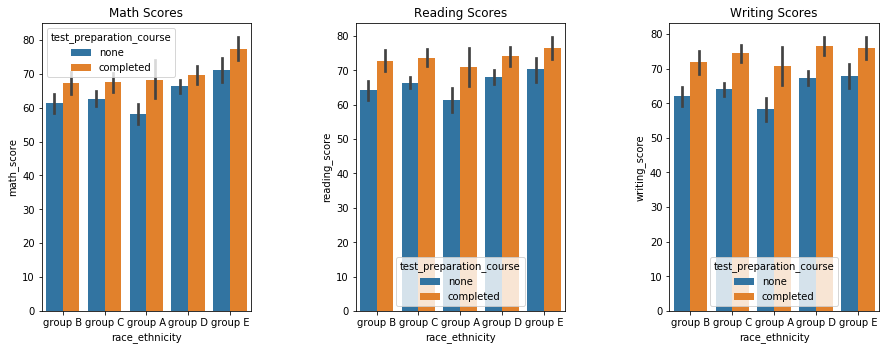

In [24]:
plt.figure(figsize=(15,5))
plt.subplots_adjust(left=0.125,bottom=0.1,right=0.9,top=0.9,wspace=0.5,hspace=0.2)

plt.subplot(131)
plt.title("Math Scores")
sns.barplot(x="race_ethnicity",y="math_score",hue="test_preparation_course",data=st)

plt.subplot(132)
plt.title("Reading Scores")
sns.barplot(x="race_ethnicity",y="reading_score",hue="test_preparation_course",data=st)

plt.subplot(133)
plt.title("Writing Scores")
sns.barplot(x="race_ethnicity",y="writing_score",hue="test_preparation_course",data=st)

plt.show()


# Observations:

* Students who have completed the test preparation course have scored better than those who haven't.
* Students of Group E race have scored more in Maths and Reading.
* There is a very small difference in the math scores of students who have completed and not completed their test preparation course who belong to Group D.
* Students belonging to group A race have scored the lowest in all three tests.
* Group A Race people who have solved the test preparation course have scored between 60 to 70 in all 3 tests.
* Group C and Group B Students who have completed the course have almost the same scores in all 3 tests.

<function matplotlib.pyplot.show(*args, **kw)>

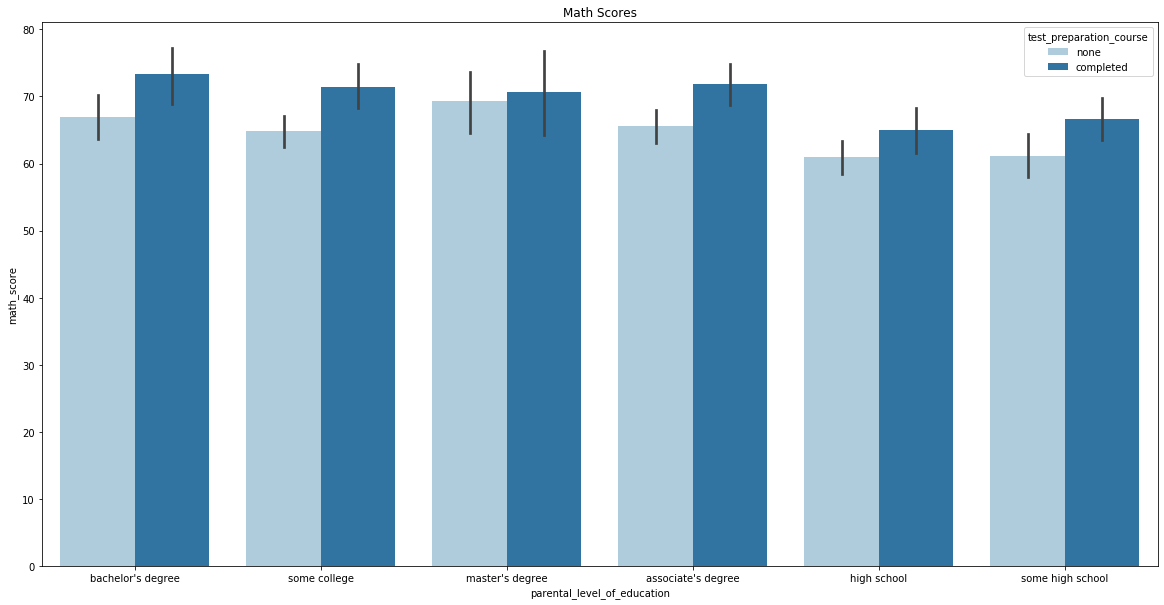

In [25]:
plt.figure(figsize=(20,10))
plt.title("Math Scores")
sns.barplot(x="parental_level_of_education",y="math_score",hue="test_preparation_course",data=st,palette="Paired")
plt.show

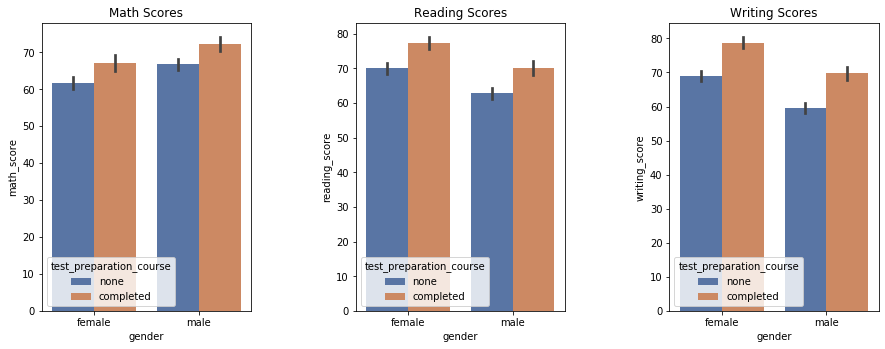

In [26]:
plt.figure(figsize=(15,5))
plt.subplots_adjust(left=0.125,bottom=0.1,right=0.9,top=0.9,wspace=0.5,hspace=0.2)

plt.subplot(131)
plt.title("Math Scores")
sns.barplot(x="gender",y="math_score",hue="test_preparation_course",data=st,palette="deep")

plt.subplot(132)
plt.title("Reading Scores")
sns.barplot(x="gender",y="reading_score",hue="test_preparation_course",data=st,palette="deep")

plt.subplot(133)
plt.title("Writing Scores")
sns.barplot(x="gender",y="writing_score",hue="test_preparation_course",data=st,palette="deep")

plt.show()


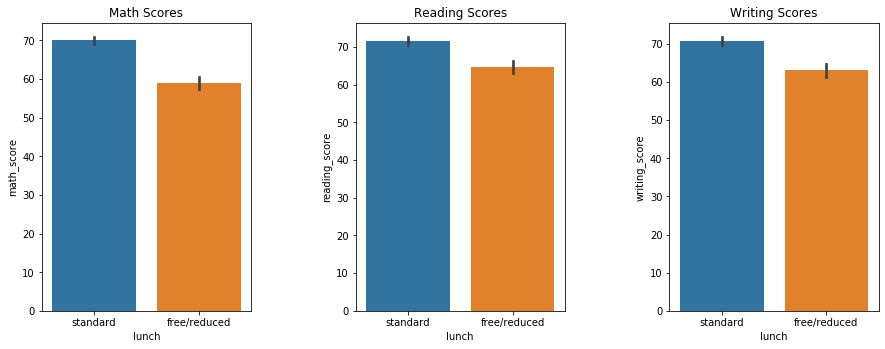

In [27]:
plt.figure(figsize=(15,5))
plt.subplots_adjust(left=0.125,bottom=0.1,right=0.9,top=0.9,wspace=0.5,hspace=0.2)

plt.subplot(131)
plt.title("Math Scores")
sns.barplot(x="lunch",y="math_score",data=st)

plt.subplot(132)
plt.title("Reading Scores")
sns.barplot(x="lunch",y="reading_score",data=st)

plt.subplot(133)
plt.title("Writing Scores")
sns.barplot(x="lunch",y="writing_score",data=st)

plt.show()

# Observations:

* Students whose parents have bachelor degrees have scored more in maths followed by those who have associate degrees and have gone to some college.
* Students' with parents who have master degrees have high scores in maths irrespective of whether they have completed the test preparation course.
* Students whose parents have only gone to high school have scored less in maths.
* Male students have scored more than female students in Math but have scored lesser in the other 2 tests.
* Students who have standard lunch have scored better in all 3 tests than people who have free or reduced lunch.

Now we compare categorical variables among themselves.

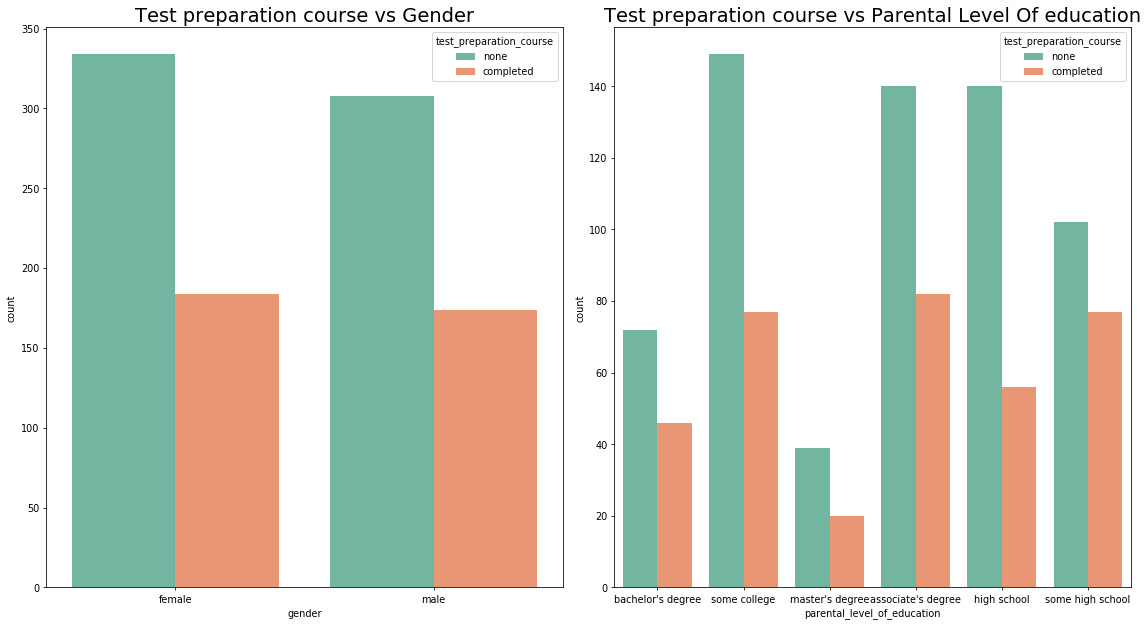

In [28]:
plt.figure(figsize=(20,10), dpi=70) 
plt.subplots_adjust(left=0.125,bottom=0.1,right=0.9,top=0.9,wspace=0.100,hspace=0.2)

plt.subplot(1,2,1)
plt.title("Test preparation course vs Gender",fontsize=20)
sns.countplot(x="gender",hue="test_preparation_course",data=st,palette="Set2")

plt.subplot(1,2,2)
plt.title("Test preparation course vs Parental Level Of education",fontsize=20)
sns.countplot(x="parental_level_of_education",hue="test_preparation_course",data=st,palette="Set2")

plt.show()

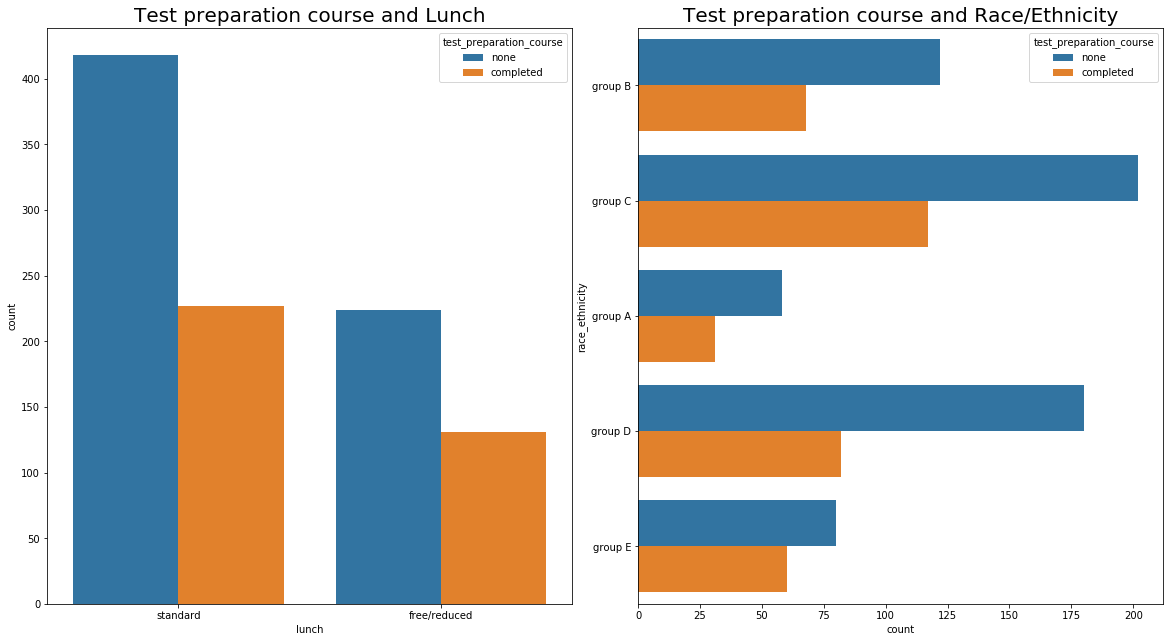

In [29]:
plt.figure(figsize=(20,10))
plt.subplots_adjust(left=0.125,bottom=0.1,right=0.9,top=0.9,wspace=0.125,hspace=0.2)

plt.subplot(1,2,1)
plt.title("Test preparation course and Lunch",fontsize=20)
sns.countplot(x="lunch",hue="test_preparation_course",data=st)

plt.subplot(1,2,2)
plt.title("Test preparation course and Race/Ethnicity",fontsize=20)
sns.countplot(y="race_ethnicity",hue="test_preparation_course",data=st)

plt.show()

# Observations:

* A high proportion of students have not completed their test preparation courses.
* Students whose parents have Master's degree, bachelor Degree and have gone to some high school have less difference between those who have completed and not completed their test preparation course while the other students have a very large difference among those who have completed and not completed the test preparation course.
* There is a small difference between students of group E who have completed and not completed their courses.

<Figure size 720x720 with 0 Axes>

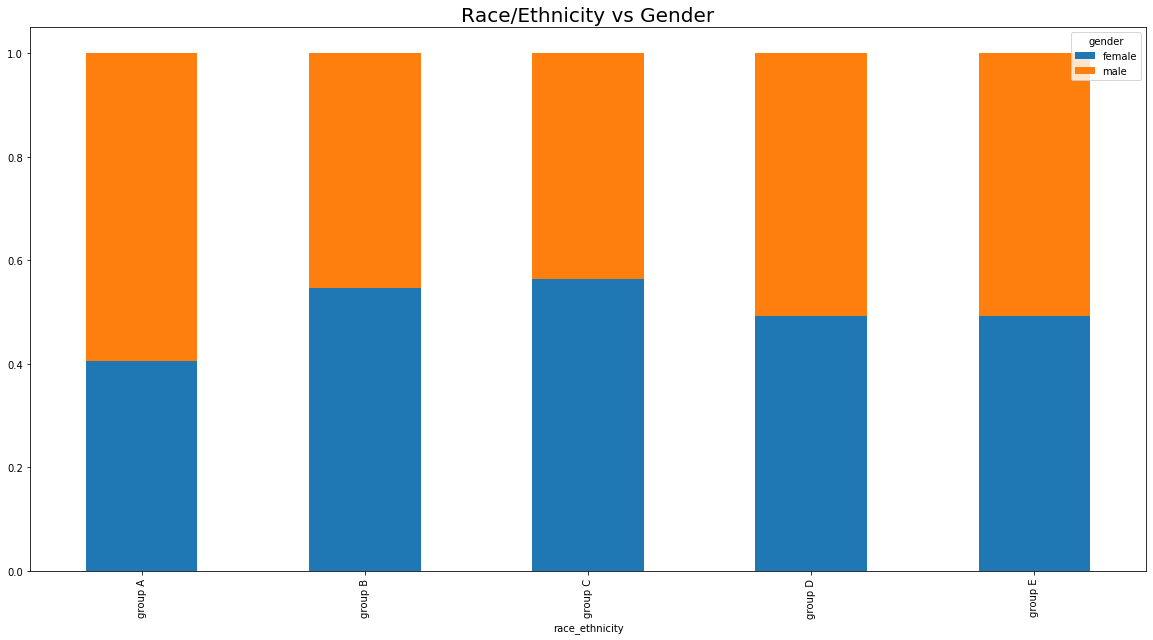

In [45]:
plt.figure(figsize=(10,10))
sp=pd.crosstab(st.race_ethnicity,st.gender,normalize=0)

sp.plot.bar(stacked=True)
plt.title("Race/Ethnicity vs Gender",fontsize=20)
plt.show()

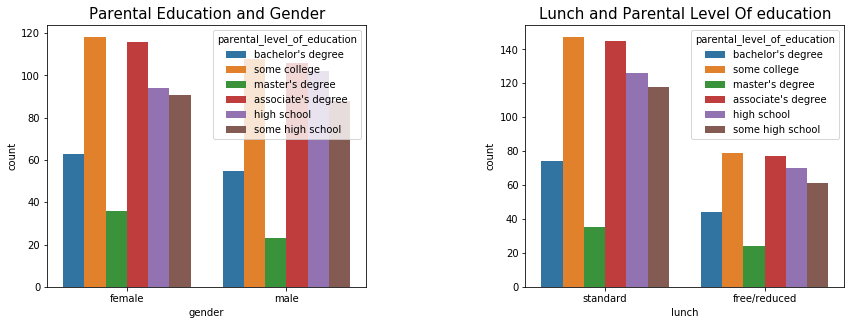

In [31]:
plt.figure(figsize=(40,10))
plt.subplots_adjust(left=0.125,bottom=0.1,right=0.9,top=0.9,wspace=0.5,hspace=0.2)

plt.subplot(251)
plt.title("Parental Education and Gender",fontsize=15)
sns.countplot(x="gender",hue="parental_level_of_education",data=st)

plt.subplot(252)
plt.title("Lunch and Parental Level Of education",fontsize=15)
sns.countplot(hue="parental_level_of_education",x="lunch",data=st)

plt.show()

# Observations:

* There are a high proportion of females in Group C and Group B than males
* There are equal amounts of male and female students in Group D and Group E.
* There are more male students whose parents have just passed high school than female students.

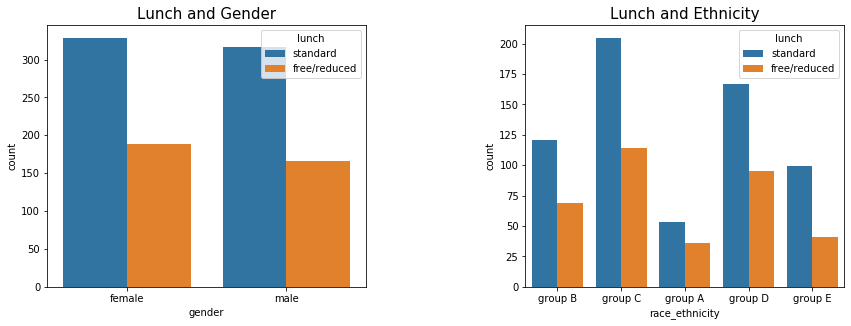

In [32]:
plt.figure(figsize=(40,10))
plt.subplots_adjust(left=0.125,bottom=0.1,right=0.9,top=0.9,wspace=0.5,hspace=0.2)

plt.subplot(251)
plt.title("Lunch and Gender",fontsize=15)
sns.countplot(x="gender", hue="lunch",data=st)

plt.subplot(252)
plt.title("Lunch and Ethnicity",fontsize=15)
sns.countplot(x="race_ethnicity", hue="lunch",data=st)

plt.show()

<Figure size 720x720 with 0 Axes>

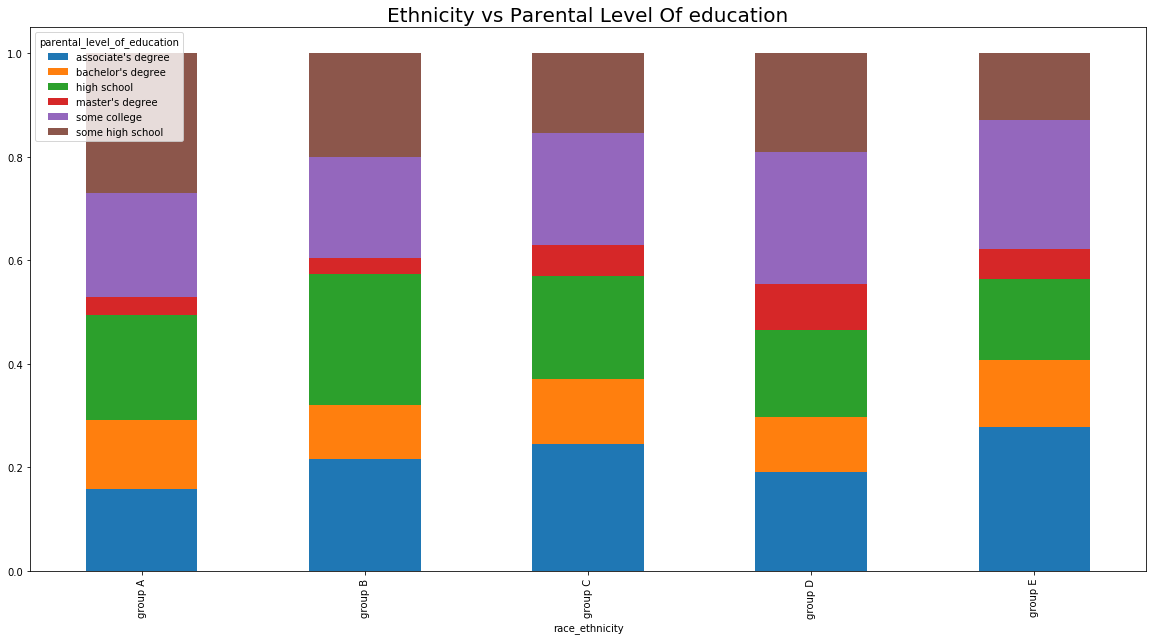

In [44]:
plt.figure(figsize=(10,10))
sp=pd.crosstab(st.race_ethnicity,st.parental_level_of_education,normalize=0)

sp.plot.bar(stacked=True)
plt.title("Ethnicity vs Parental Level Of education",fontsize=20)
plt.show()

# Observations:

* There is a small difference between students of Group A who have standard lunch or free/reduced lunch.
* Most Students of group C eat standard lunch.
* Most students with parents who have just passed from some high school are from Group A.
* Most of the student's who have parents with masters's degrees are from Group D.
* A high proportion of students whose parents have just gone to high school are from Group B.
* The most educated parents with associate degree, bachelor degree and master's degree belong to group E.

Now that we're done observing all combinations of variables, we would like to see the percentage and grades of students and their overall performance.

In [34]:
st['total_marks']=st['math_score'] + st['reading_score'] + st['writing_score']
st["percentage"]=st["total_marks"]/3

## Grades

 * Grade A+ : Between 90 to 100
 * Grade A  : Between 80 to 90
 * Grade B+ : Between 70 to 80
 * Grade B  : Between 60 to 70
 * Grade C  : Between 50 to 60
 * Grade D  : Between 35 to 50
 * Grade F  : Between 0  to 35
 
These caegories of grades will then be compared for better analysis.

In [35]:
def determine_grade(scores):
    if scores >= 90 and scores <= 100:
        return "Grade A+"
    elif scores >= 80 and scores < 90:
        return "Grade A"
    elif scores >= 70 and scores < 80:
        return "Grade B+"
    elif scores >= 60 and scores < 70:
        return "Grade B"
    elif scores >= 50 and scores < 60:
        return "Grade C"
    elif scores >= 35 and scores < 50:
        return "Grade D"
    elif scores >= 0 and scores < 35:
        return "Grade F"

st["grades"]=st["percentage"].apply(determine_grade)

In [36]:
st.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   object 
 1   race_ethnicity               1000 non-null   object 
 2   parental_level_of_education  1000 non-null   object 
 3   lunch                        1000 non-null   object 
 4   test_preparation_course      1000 non-null   object 
 5   math_score                   1000 non-null   int64  
 6   reading_score                1000 non-null   int64  
 7   writing_score                1000 non-null   int64  
 8   total_marks                  1000 non-null   int64  
 9   percentage                   1000 non-null   float64
 10  grades                       1000 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 86.1+ KB


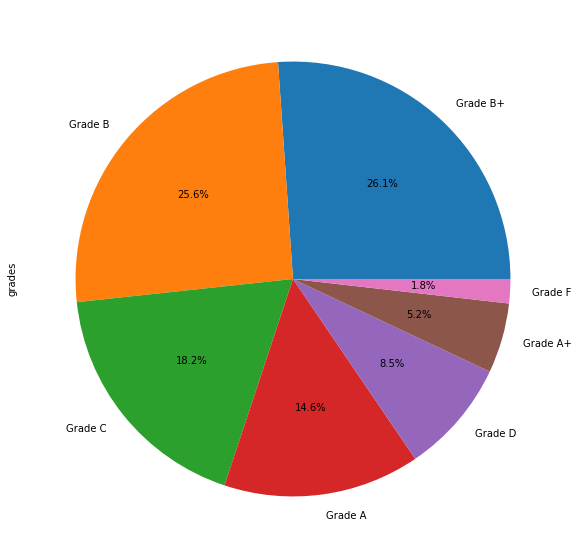

In [37]:
st["grades"].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

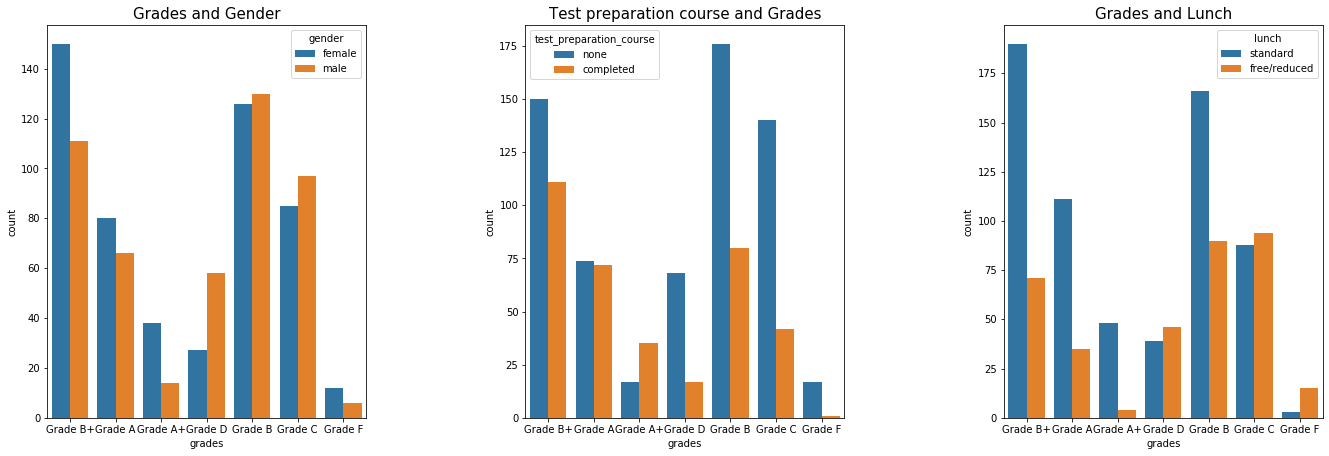

In [38]:
plt.figure(figsize=(40,15))
plt.subplots_adjust(left=0.125,bottom=0.1,right=0.9,top=0.9,wspace=0.5,hspace=0.2)

plt.subplot(251)
plt.title("Grades and Gender",fontsize=15)
sns.countplot(x="grades",hue="gender",data=st)

plt.subplot(252)
plt.title("Test preparation course and Grades",fontsize=15)
sns.countplot(x="grades",hue="test_preparation_course",data=st)

plt.subplot(253)
plt.title("Grades and Lunch",fontsize=15)
sns.countplot(x="grades",hue="lunch",data=st)

plt.show()


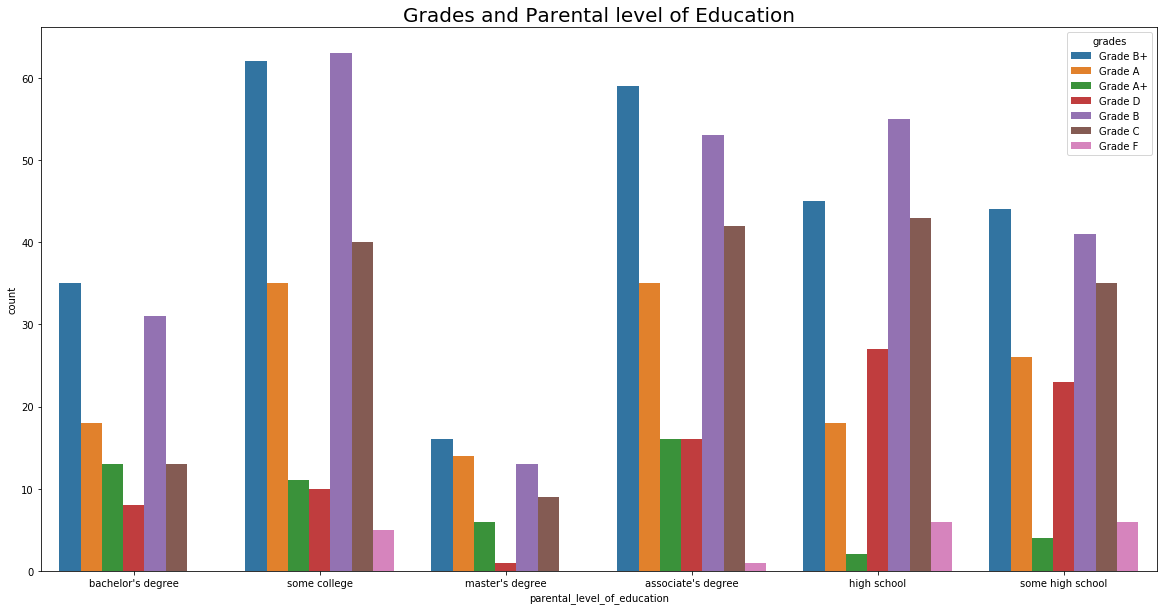

In [39]:
plt.figure(figsize=(20,10))
plt.title("Grades and Parental level of Education",fontsize=20)
sns.countplot(x="parental_level_of_education",hue="grades",data=st)
plt.show()

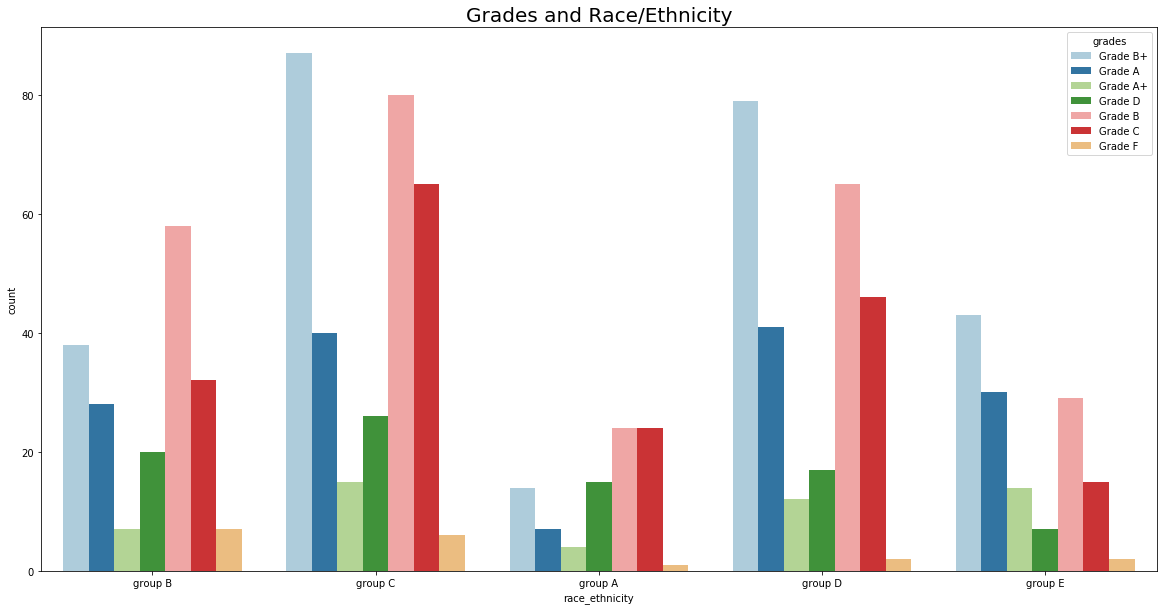

In [40]:
plt.figure(figsize=(20,10))
plt.title("Grades and Race/Ethnicity",fontsize=20)
sns.countplot(x="race_ethnicity",hue="grades",data=st,palette="Paired")
plt.show()

# Observations:

* Most Students received a B+ in their tests followed by a B and C.
* There are more males who've gotten a grade B, C and D than females.
* Most Female students have gotten a B+ while most male students have gotten a B.
* People who have completed their test preparation scores are the only ones who received A+ while grade F has been students who haven't completed the course.
* Most of the students with grade C,D and Grade F have free/reduced lunch than standard lunch.
* Students whose parents have associate degrees have the most A+ grade.
* Students with parents who have masters and bachelors degrees have not gotten a grade F.
* Students whose parents have just gone to high school have the least A+ grade.
* Group C and Group E have the highest A+ students.
* Group B have gotten the most F grade students.